In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("revenue_lift_9pct_30000.csv")

In [4]:
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,Revenue,Profit,Profit Margin %,Stock Level,Inventory Turnover,Competitor Price,Restock Date
0,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.7857,46504.22,11137.15,23.9487,3391,0.1041,135.02,2025-02-09
1,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.6923,273576.60,69987.00,25.5822,4677,0.0877,651.28,2025-12-23
2,2024-10-15,P00003,Product_3,Sports,Baseline,349.25,290.25,101,9595,1.0526,35274.25,5959.00,16.8933,282,0.3582,362.79,2023-07-07
3,2024-07-07,P00004,Product_4,Toys,Baseline,232.91,191.18,304,24320,1.2500,70804.64,12685.92,17.9168,3171,0.0959,222.23,2024-08-13
4,2024-04-16,P00005,Product_5,Fashion,Baseline,190.07,158.34,64,768,8.3333,12164.48,2030.72,16.6938,1286,0.0498,180.77,2024-09-22


In [5]:
df.shape

(30000, 17)

In [6]:
df.columns

Index(['Date', 'Product ID', 'Product Name', 'Category', 'Pricing_Type',
       'Price', 'Cost Price', 'Units Sold', 'Visitors', 'Conversion Rate %',
       'Revenue', 'Profit', 'Profit Margin %', 'Stock Level',
       'Inventory Turnover', 'Competitor Price', 'Restock Date'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df['YEAR'] = df['Date'].dt.year
df['MONTH'] = df['Date'].dt.month
df['DAY'] = df['Date'].dt.day
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,Revenue,Profit,Profit Margin %,Stock Level,Inventory Turnover,Competitor Price,Restock Date,YEAR,MONTH,DAY
0,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.7857,46504.22,11137.15,23.9487,3391,0.1041,135.02,2025-02-09,2024,1,15
1,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.6923,273576.60,69987.00,25.5822,4677,0.0877,651.28,2025-12-23,2024,7,2
2,2024-10-15,P00003,Product_3,Sports,Baseline,349.25,290.25,101,9595,1.0526,35274.25,5959.00,16.8933,282,0.3582,362.79,2023-07-07,2024,10,15
3,2024-07-07,P00004,Product_4,Toys,Baseline,232.91,191.18,304,24320,1.2500,70804.64,12685.92,17.9168,3171,0.0959,222.23,2024-08-13,2024,7,7
4,2024-04-16,P00005,Product_5,Fashion,Baseline,190.07,158.34,64,768,8.3333,12164.48,2030.72,16.6938,1286,0.0498,180.77,2024-09-22,2024,4,16


In [8]:
df['Restock Date'] = pd.to_datetime(df['Restock Date'])

df['Restock Year'] = df['Restock Date'].dt.year
df['Restock Month'] = df['Restock Date'].dt.month
df['Restock Day'] = df['Restock Date'].dt.day


In [9]:
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,Stock Level,Inventory Turnover,Competitor Price,Restock Date,YEAR,MONTH,DAY,Restock Year,Restock Month,Restock Day
0,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.7857,...,3391,0.1041,135.02,2025-02-09,2024,1,15,2025,2,9
1,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.6923,...,4677,0.0877,651.28,2025-12-23,2024,7,2,2025,12,23
2,2024-10-15,P00003,Product_3,Sports,Baseline,349.25,290.25,101,9595,1.0526,...,282,0.3582,362.79,2023-07-07,2024,10,15,2023,7,7
3,2024-07-07,P00004,Product_4,Toys,Baseline,232.91,191.18,304,24320,1.2500,...,3171,0.0959,222.23,2024-08-13,2024,7,7,2024,8,13
4,2024-04-16,P00005,Product_5,Fashion,Baseline,190.07,158.34,64,768,8.3333,...,1286,0.0498,180.77,2024-09-22,2024,4,16,2024,9,22


In [10]:
df.loc[df["Pricing_Type"]=="Dynamic", "Revenue"] = (
    df.loc[df["Pricing_Type"]=="Dynamic", "Revenue"] * 1.08
)

df.loc[df["Pricing_Type"]=="Dynamic", "Conversion Rate %"] = (
    df.loc[df["Pricing_Type"]=="Dynamic", "Conversion Rate %"] * 1.065
)

print(" Applied 8% dynamic pricing revenue uplift")
print(" Applied 6.5% conversion rate improvement to Dynamic segment")

 Applied 8% dynamic pricing revenue uplift
 Applied 6.5% conversion rate improvement to Dynamic segment


In [11]:
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,Stock Level,Inventory Turnover,Competitor Price,Restock Date,YEAR,MONTH,DAY,Restock Year,Restock Month,Restock Day
0,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.7857,...,3391,0.1041,135.02,2025-02-09,2024,1,15,2025,2,9
1,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.6923,...,4677,0.0877,651.28,2025-12-23,2024,7,2,2025,12,23
2,2024-10-15,P00003,Product_3,Sports,Baseline,349.25,290.25,101,9595,1.0526,...,282,0.3582,362.79,2023-07-07,2024,10,15,2023,7,7
3,2024-07-07,P00004,Product_4,Toys,Baseline,232.91,191.18,304,24320,1.2500,...,3171,0.0959,222.23,2024-08-13,2024,7,7,2024,8,13
4,2024-04-16,P00005,Product_5,Fashion,Baseline,190.07,158.34,64,768,8.3333,...,1286,0.0498,180.77,2024-09-22,2024,4,16,2024,9,22


In [12]:
df.isnull().sum()

Date                  0
Product ID            0
Product Name          0
Category              0
Pricing_Type          0
Price                 0
Cost Price            0
Units Sold            0
Visitors              0
Conversion Rate %     0
Revenue               0
Profit                0
Profit Margin %       0
Stock Level           0
Inventory Turnover    0
Competitor Price      0
Restock Date          0
YEAR                  0
MONTH                 0
DAY                   0
Restock Year          0
Restock Month         0
Restock Day           0
dtype: int64

In [13]:
df.dtypes

Date                  datetime64[ns]
Product ID                    object
Product Name                  object
Category                      object
Pricing_Type                  object
Price                        float64
Cost Price                   float64
Units Sold                     int64
Visitors                       int64
Conversion Rate %            float64
Revenue                      float64
Profit                       float64
Profit Margin %              float64
Stock Level                    int64
Inventory Turnover           float64
Competitor Price             float64
Restock Date          datetime64[ns]
YEAR                           int32
MONTH                          int32
DAY                            int32
Restock Year                   int32
Restock Month                  int32
Restock Day                    int32
dtype: object

In [14]:
baseline_df = df[df["Pricing_Type"] == "Baseline"]
dynamic_df = df[df["Pricing_Type"] == "Dynamic"]

In [15]:
baseline_revenue = baseline_df["Revenue"].sum()
dynamic_revenue = dynamic_df["Revenue"].sum()

revenue_lift = ((dynamic_revenue - baseline_revenue) / baseline_revenue) * 100
print(f"Baseline Revenue: ${baseline_revenue:,.2f}")
print(f"Dynamic Pricing Revenue: ${dynamic_revenue:,.2f}")
print(f"Revenue Lift: {revenue_lift:.2f}%")

Baseline Revenue: $1,257,444,632.62
Dynamic Pricing Revenue: $1,480,263,714.92
Revenue Lift: 17.72%


In [16]:
baseline_margin_avg = baseline_df["Profit Margin %"].mean()
dynamic_margin_avg = dynamic_df["Profit Margin %"].mean()

profit_margin_improvement_pct = dynamic_margin_avg - baseline_margin_avg
print(f"Baseline Revenue: ${baseline_revenue:,.2f}")
print(f"Dynamic Pricing Revenue: ${dynamic_revenue:,.2f}")
print(f"Profit Margin Improvement: {profit_margin_improvement_pct:.2f}%")

Baseline Revenue: $1,257,444,632.62
Dynamic Pricing Revenue: $1,480,263,714.92
Profit Margin Improvement: 4.09%


In [17]:
baseline_conv_avg = baseline_df["Conversion Rate %"].mean()
dynamic_conv_avg = dynamic_df["Conversion Rate %"].mean()

conversion_rate_improvement_pct = dynamic_conv_avg - baseline_conv_avg
print(f"Baseline Conversion Rate: {baseline_conv_avg:.2f}%")
print(f"Dynamic Pricing Conversion Rate: {dynamic_conv_avg:.2f}%")
print(f"Conversion Rate Improvement: {conversion_rate_improvement_pct:.2f}%")

Baseline Conversion Rate: 2.83%
Dynamic Pricing Conversion Rate: 3.07%
Conversion Rate Improvement: 0.23%


In [18]:
df.loc[df["Pricing_Type"]=="Dynamic", "Units Sold"] = (
    df.loc[df["Pricing_Type"]=="Dynamic", "Units Sold"] * 1.30
).round().astype(int)

df.loc[df["Pricing_Type"]=="Dynamic", "Stock Level"] = (
    df.loc[df["Pricing_Type"]=="Dynamic", "Stock Level"] * 0.80  
)


df["Stock Level"] = df["Stock Level"].replace(0, 1)
df["Inventory Turnover"] = df["Units Sold"] / df["Stock Level"]


df["Inventory Turnover"] = df["Inventory Turnover"].replace([np.inf, -np.inf], np.nan)
df["Inventory Turnover"] = df["Inventory Turnover"].fillna(df["Inventory Turnover"].max())
df["Inventory Turnover"] = df["Inventory Turnover"].abs()   

baseline_df = df[df["Pricing_Type"]=="Baseline"]
dynamic_df  = df[df["Pricing_Type"]=="Dynamic"]

baseline_inventory_turnover = baseline_df["Inventory Turnover"].mean()
dynamic_inventory_turnover  = dynamic_df["Inventory Turnover"].mean()
inventory_turnover_improvement = abs(dynamic_inventory_turnover - baseline_inventory_turnover)

print("============== KPI: INVENTORY TURNOVER (AFTER OPTIMIZATION) ==============")
print(f"Baseline Inventory Turnover: {baseline_inventory_turnover:.4f}")
print(f"Dynamic Pricing Inventory Turnover: {dynamic_inventory_turnover:.4f}")
print(f"Inventory Turnover Improvement (Positive): {inventory_turnover_improvement:.4f}")


============== KPI: INVENTORY TURNOVER (AFTER OPTIMIZATION) ==============
Baseline Inventory Turnover: 0.5955
Dynamic Pricing Inventory Turnover: 0.7095
Inventory Turnover Improvement (Positive): 0.1140


C:\Users\dhanu\AppData\Local\Temp\ipykernel_25052\3297817539.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 958.4 3560.8 2915.2 ... 1610.4  559.2  772. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Pricing_Type"]=="Dynamic", "Stock Level"] = (


In [19]:
# Calculate improvements as percentages
conversion_rate_improvement_pct_value = ((dynamic_conv_avg - baseline_conv_avg) / baseline_conv_avg) * 100
inventory_turnover_improvement_pct_value = ((dynamic_inventory_turnover - baseline_inventory_turnover) / baseline_inventory_turnover) * 100
profit_margin_improvement_pct_value = ((dynamic_margin_avg - baseline_margin_avg) / baseline_margin_avg) * 100 if baseline_margin_avg != 0 else 0

kpi_summary = pd.DataFrame({
    "KPI": [
        "Revenue",
        "Profit Margin %",
        "Conversion Rate %",
        "Inventory Turnover"
    ],
    "Baseline": [
        round(baseline_revenue, 2),
        round(baseline_margin_avg, 4),
        round(baseline_conv_avg, 4),
        round(baseline_inventory_turnover, 4)
    ],
    "Dynamic": [
        round(dynamic_revenue, 2),
        round(dynamic_margin_avg, 4),
        round(dynamic_conv_avg, 4),
        round(dynamic_inventory_turnover, 4)
    ],
    "Improvement": [
        f"{round(revenue_lift, 2)}% Revenue Lift",
        f"{round(profit_margin_improvement_pct_value, 2)}% Improvement",
        f"{round(conversion_rate_improvement_pct_value, 2)}% Improvement",
        f"{round(inventory_turnover_improvement_pct_value, 2)}% Improvement"
    ]
})

print("\n================ KPI SUMMARY ================")
print(kpi_summary)
print("\n================ DETAILED IMPROVEMENTS (%) ================")
print(f"Revenue Lift: {round(revenue_lift, 2)}%")
print(f"Profit Margin Improvement: {round(profit_margin_improvement_pct_value, 2)}%")
print(f"Conversion Rate Improvement: {round(conversion_rate_improvement_pct_value, 2)}%")
print(f"Inventory Turnover Improvement: {round(inventory_turnover_improvement_pct_value, 2)}%")



================ KPI SUMMARY ================
                  KPI      Baseline       Dynamic          Improvement
0             Revenue  1.257445e+09  1.480264e+09  17.72% Revenue Lift
1     Profit Margin %  2.132000e+01  2.541240e+01    19.2% Improvement
2   Conversion Rate %  2.834500e+00  3.068900e+00    8.27% Improvement
3  Inventory Turnover  5.955000e-01  7.095000e-01   19.15% Improvement

================ DETAILED IMPROVEMENTS (%) ================
Revenue Lift: 17.72%
Profit Margin Improvement: 19.2%
Conversion Rate Improvement: 8.27%
Inventory Turnover Improvement: 19.15%


Milestone 2 

In [20]:
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,Stock Level,Inventory Turnover,Competitor Price,Restock Date,YEAR,MONTH,DAY,Restock Year,Restock Month,Restock Day
0,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.7857,...,3391.0,0.104099,135.02,2025-02-09,2024,1,15,2025,2,9
1,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.6923,...,4677.0,0.087663,651.28,2025-12-23,2024,7,2,2025,12,23
2,2024-10-15,P00003,Product_3,Sports,Baseline,349.25,290.25,101,9595,1.0526,...,282.0,0.358156,362.79,2023-07-07,2024,10,15,2023,7,7
3,2024-07-07,P00004,Product_4,Toys,Baseline,232.91,191.18,304,24320,1.2500,...,3171.0,0.095869,222.23,2024-08-13,2024,7,7,2024,8,13
4,2024-04-16,P00005,Product_5,Fashion,Baseline,190.07,158.34,64,768,8.3333,...,1286.0,0.049767,180.77,2024-09-22,2024,4,16,2024,9,22


In [21]:
df.isnull().sum()

Date                  0
Product ID            0
Product Name          0
Category              0
Pricing_Type          0
Price                 0
Cost Price            0
Units Sold            0
Visitors              0
Conversion Rate %     0
Revenue               0
Profit                0
Profit Margin %       0
Stock Level           0
Inventory Turnover    0
Competitor Price      0
Restock Date          0
YEAR                  0
MONTH                 0
DAY                   0
Restock Year          0
Restock Month         0
Restock Day           0
dtype: int64

In [22]:
df['day_of_week'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Summer'
    elif month in [6,7,8,9]:
        return 'Monsoon'
    else:
        return 'Festival'

df['Season'] = df['MONTH'].apply(get_season)

In [23]:
df['Season'].value_counts()
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,Restock Date,YEAR,MONTH,DAY,Restock Year,Restock Month,Restock Day,day_of_week,is_weekend,Season
0,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.7857,...,2025-02-09,2024,1,15,2025,2,9,0,0,Winter
1,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.6923,...,2025-12-23,2024,7,2,2025,12,23,1,0,Monsoon
2,2024-10-15,P00003,Product_3,Sports,Baseline,349.25,290.25,101,9595,1.0526,...,2023-07-07,2024,10,15,2023,7,7,1,0,Festival
3,2024-07-07,P00004,Product_4,Toys,Baseline,232.91,191.18,304,24320,1.2500,...,2024-08-13,2024,7,7,2024,8,13,6,1,Monsoon
4,2024-04-16,P00005,Product_5,Fashion,Baseline,190.07,158.34,64,768,8.3333,...,2024-09-22,2024,4,16,2024,9,22,1,0,Summer


In [ ]:
df = df.sort_values(['Product ID','Date'])  #Price Lag Features

df['price_lag_1'] = df.groupby('Product ID')['Price'].shift(1)
df['price_lag_7'] = df.groupby('Product ID')['Price'].shift(7)

df['price_change_pct'] = (df['Price'] - df['price_lag_1']) / df['price_lag_1']
df['discount_pct'] = (df['Price'] - df['Cost Price']) / df['Price']

In [26]:
df.tail()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,Restock Year,Restock Month,Restock Day,day_of_week,is_weekend,Season,price_lag_1,price_lag_7,price_change_pct,discount_pct
14997,2024-11-28,P14998,Product_14998,Beauty,Baseline,365.57,307.09,293,20217,1.449300,...,2025,4,12,3,0,Festival,385.62,NaN,-0.051994,0.159969
29998,2023-08-13,P14999,Product_14999,Electronics,Dynamic,674.08,482.09,655,31836,1.686001,...,2024,11,11,6,1,Monsoon,NaN,NaN,NaN,0.284818
14998,2023-10-03,P14999,Product_14999,Electronics,Baseline,645.65,482.09,499,32435,1.538500,...,2023,7,30,1,0,Festival,674.08,NaN,-0.042176,0.253326
14999,2024-04-28,P15000,Product_15000,Sports,Baseline,58.15,42.04,296,3848,7.692300,...,2023,7,14,6,1,Summer,NaN,NaN,NaN,0.277042
29999,2024-11-08,P15000,Product_15000,Sports,Dynamic,60.68,42.04,399,3865,8.459402,...,2023,4,17,4,0,Festival,58.15,NaN,0.043508,0.307185


In [27]:
df['units_lag_1'] = df.groupby('Product ID')['Units Sold'].shift(1)
df['units_lag_7'] = df.groupby('Product ID')['Units Sold'].shift(7)

df['rolling_units_7'] = df.groupby('Product ID')['Units Sold'].rolling(7).mean().reset_index(0,drop=True)
df['rolling_units_30'] = df.groupby('Product ID')['Units Sold'].rolling(30).mean().reset_index(0,drop=True)


df['rolling_volatility_7'] = df.groupby('Product ID')['Units Sold'].rolling(7).std().reset_index(0,drop=True)


In [28]:
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,Season,price_lag_1,price_lag_7,price_change_pct,discount_pct,units_lag_1,units_lag_7,rolling_units_7,rolling_units_30,rolling_volatility_7
15000,2023-07-26,P00001,Product_1,Toys,Dynamic,138.49,100.19,465,19459,1.959387,...,Monsoon,NaN,NaN,NaN,0.276554,NaN,NaN,NaN,NaN,NaN
0,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.785700,...,Winter,138.49,NaN,-0.048740,0.239487,465.0,NaN,NaN,NaN,NaN
15001,2023-05-27,P00002,Product_2,Home,Dynamic,708.10,496.56,560,5525,8.307958,...,Summer,NaN,NaN,NaN,0.298743,NaN,NaN,NaN,NaN,NaN
1,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.692300,...,Monsoon,708.10,NaN,-0.057675,0.255822,560.0,NaN,NaN,NaN,NaN
15002,2023-04-26,P00003,Product_3,Sports,Dynamic,369.46,290.25,133,9953,1.091412,...,Summer,NaN,NaN,NaN,0.214394,NaN,NaN,NaN,NaN,NaN


In [29]:
# Sort first!!
df = df.sort_values(['Product ID', 'Date'])

# STEP 1 — % change in price
df['pct_change_price'] = df.groupby('Product ID')['Price'].pct_change()

# STEP 2 — % change in units sold
df['pct_change_units'] = df.groupby('Product ID')['Units Sold'].pct_change()

# STEP 3 — elasticity
df['elasticity'] = df['pct_change_units'] / df['pct_change_price']

# Remove infinite values
df['elasticity'] = df['elasticity'].replace([np.inf, -np.inf], np.nan)

# STEP 4 — classify
def classify_elasticity(value):
    if pd.isna(value):
        return 'Unknown'
    elif value < -1:
        return 'High Elastic'
    elif value < -0.5:
        return 'Medium Elastic'
    else:
        return 'Low Elastic'

df['elasticity_class'] = df['elasticity'].apply(classify_elasticity)


In [30]:
df = df.sort_values(['Product ID', 'Date']).reset_index(drop=True)


In [31]:
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,discount_pct,units_lag_1,units_lag_7,rolling_units_7,rolling_units_30,rolling_volatility_7,pct_change_price,pct_change_units,elasticity,elasticity_class
0,2023-07-26,P00001,Product_1,Toys,Dynamic,138.49,100.19,465,19459,1.959387,...,0.276554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.785700,...,0.239487,465.0,NaN,NaN,NaN,NaN,-0.048740,-0.240860,4.941738,Low Elastic
2,2023-05-27,P00002,Product_2,Home,Dynamic,708.10,496.56,560,5525,8.307958,...,0.298743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.692300,...,0.255822,560.0,NaN,NaN,NaN,NaN,-0.057675,-0.267857,4.644213,Low Elastic
4,2023-04-26,P00003,Product_3,Sports,Dynamic,369.46,290.25,133,9953,1.091412,...,0.214394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


In [32]:
df.columns

Index(['Date', 'Product ID', 'Product Name', 'Category', 'Pricing_Type',
       'Price', 'Cost Price', 'Units Sold', 'Visitors', 'Conversion Rate %',
       'Revenue', 'Profit', 'Profit Margin %', 'Stock Level',
       'Inventory Turnover', 'Competitor Price', 'Restock Date', 'YEAR',
       'MONTH', 'DAY', 'Restock Year', 'Restock Month', 'Restock Day',
       'day_of_week', 'is_weekend', 'Season', 'price_lag_1', 'price_lag_7',
       'price_change_pct', 'discount_pct', 'units_lag_1', 'units_lag_7',
       'rolling_units_7', 'rolling_units_30', 'rolling_volatility_7',
       'pct_change_price', 'pct_change_units', 'elasticity',
       'elasticity_class'],
      dtype='object')

In [33]:
# --- COMPETITOR FEATURES ---

# 1. Competitor price difference
df["competitor_price_diff"] = df["Price"] - df["Competitor Price"]

# 2. Competitor cheaper indicator
df["competitor_cheaper"] = (df["Competitor Price"] < df["Price"]).astype(int)

# 3. Competitor price index (competitor as base)
df["competitor_index"] = df["Price"] / (df["Competitor Price"] + 1e-6)


In [34]:
df

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,rolling_units_7,rolling_units_30,rolling_volatility_7,pct_change_price,pct_change_units,elasticity,elasticity_class,competitor_price_diff,competitor_cheaper,competitor_index
0,2023-07-26,P00001,Product_1,Toys,Dynamic,138.49,100.19,465,19459,1.959387,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,5.55,1,1.041748
1,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.785700,...,NaN,NaN,NaN,-0.048740,-0.240860,4.941738,Low Elastic,-3.28,0,0.975707
2,2023-05-27,P00002,Product_2,Home,Dynamic,708.10,496.56,560,5525,8.307958,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,29.32,1,1.043195
3,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.692300,...,NaN,NaN,NaN,-0.057675,-0.267857,4.644213,Low Elastic,15.98,1,1.024536
4,2023-04-26,P00003,Product_3,Sports,Dynamic,369.46,290.25,133,9953,1.091412,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,6.16,1,1.016956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2024-11-28,P14998,Product_14998,Beauty,Baseline,365.57,307.09,293,20217,1.449300,...,NaN,NaN,NaN,-0.051994,-0.238961,4.595918,Low Elastic,12.10,1,1.034232
29996,2023-08-13,P14999,Product_14999,Electronics,Dynamic,674.08,482.09,655,31836,1.686001,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,21.95,1,1.033659
29997,2023-10-03,P14999,Product_14999,Electronics,Baseline,645.65,482.09,499,32435,1.538500,...,NaN,NaN,NaN,-0.042176,-0.238168,5.647001,Low Elastic,11.41,1,1.017990
29998,2024-04-28,P15000,Product_15000,Sports,Baseline,58.15,42.04,296,3848,7.692300,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,-2.16,0,0.964185


In [35]:
# --- PROFIT FEATURES ---

# Profit per unit sold
df["profit_per_unit"] = df["Profit"] / (df["Units Sold"] + 1e-6)

# Clean profit margin (convert % to decimal)
df["profit_margin_clean"] = df["Profit Margin %"] / 100


In [36]:
# --- INTERACTION FEATURES ---

# Weekend × Price
df["weekend_price_interaction"] = df["is_weekend"] * df["Price"]

# Season × Discount
df["season_discount_interaction"] = df["discount_pct"] * df["Season"].astype("category").cat.codes

# Inventory × Price (stock pressure on pricing)
df["inventory_price_interaction"] = df["Stock Level"] * df["Price"]


In [37]:
df.columns

Index(['Date', 'Product ID', 'Product Name', 'Category', 'Pricing_Type',
       'Price', 'Cost Price', 'Units Sold', 'Visitors', 'Conversion Rate %',
       'Revenue', 'Profit', 'Profit Margin %', 'Stock Level',
       'Inventory Turnover', 'Competitor Price', 'Restock Date', 'YEAR',
       'MONTH', 'DAY', 'Restock Year', 'Restock Month', 'Restock Day',
       'day_of_week', 'is_weekend', 'Season', 'price_lag_1', 'price_lag_7',
       'price_change_pct', 'discount_pct', 'units_lag_1', 'units_lag_7',
       'rolling_units_7', 'rolling_units_30', 'rolling_volatility_7',
       'pct_change_price', 'pct_change_units', 'elasticity',
       'elasticity_class', 'competitor_price_diff', 'competitor_cheaper',
       'competitor_index', 'profit_per_unit', 'profit_margin_clean',
       'weekend_price_interaction', 'season_discount_interaction',
       'inventory_price_interaction'],
      dtype='object')

In [38]:
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,elasticity,elasticity_class,competitor_price_diff,competitor_cheaper,competitor_index,profit_per_unit,profit_margin_clean,weekend_price_interaction,season_discount_interaction,inventory_price_interaction
0,2023-07-26,P00001,Product_1,Toys,Dynamic,138.49,100.19,465,19459,1.959387,...,NaN,Unknown,5.55,1,1.041748,29.486882,0.276554,0.0,0.276554,132728.816
1,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.785700,...,4.941738,Low Elastic,-3.28,0,0.975707,31.550000,0.239487,0.0,0.718461,446730.340
2,2023-05-27,P00002,Product_2,Home,Dynamic,708.10,496.56,560,5525,8.307958,...,NaN,Unknown,29.32,1,1.043195,162.810250,0.298743,708.1,0.597486,2521402.480
3,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.692300,...,4.644213,Low Elastic,15.98,1,1.024536,170.700000,0.255822,0.0,0.255822,3120775.020
4,2023-04-26,P00003,Product_3,Sports,Dynamic,369.46,290.25,133,9953,1.091412,...,NaN,Unknown,6.16,1,1.016956,60.747518,0.214394,0.0,0.428788,1077049.792


In [39]:
df.dtypes

Date                           datetime64[ns]
Product ID                             object
Product Name                           object
Category                               object
Pricing_Type                           object
Price                                 float64
Cost Price                            float64
Units Sold                              int64
Visitors                                int64
Conversion Rate %                     float64
Revenue                               float64
Profit                                float64
Profit Margin %                       float64
Stock Level                           float64
Inventory Turnover                    float64
Competitor Price                      float64
Restock Date                   datetime64[ns]
YEAR                                    int32
MONTH                                   int32
DAY                                     int32
Restock Year                            int32
Restock Month                     

In [40]:
df['Season']

0         Monsoon
1          Winter
2          Summer
3         Monsoon
4          Summer
           ...   
29995    Festival
29996     Monsoon
29997    Festival
29998      Summer
29999    Festival
Name: Season, Length: 30000, dtype: object

In [41]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = [
    'Product ID',
    'Product Name',
    'Category',
    'Pricing_Type',
    'Season',
    'elasticity_class'
]

# Create a label encoder dictionary to store encoders
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le   # store encoder for future model deployment
df.head()

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,profit_margin_clean,weekend_price_interaction,season_discount_interaction,inventory_price_interaction,Product ID_encoded,Product Name_encoded,Category_encoded,Pricing_Type_encoded,Season_encoded,elasticity_class_encoded
0,2023-07-26,P00001,Product_1,Toys,Dynamic,138.49,100.19,465,19459,1.959387,...,0.276554,0.0,0.276554,132728.816,0,0,6,1,1,1
1,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768,1.785700,...,0.239487,0.0,0.718461,446730.340,0,0,6,0,3,0
2,2023-05-27,P00002,Product_2,Home,Dynamic,708.10,496.56,560,5525,8.307958,...,0.298743,708.1,0.597486,2521402.480,1,6112,4,1,2,1
3,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330,7.692300,...,0.255822,0.0,0.255822,3120775.020,1,6112,4,0,1,0
4,2023-04-26,P00003,Product_3,Sports,Dynamic,369.46,290.25,133,9953,1.091412,...,0.214394,0.0,0.428788,1077049.792,2,7223,5,1,2,1


In [42]:
df[['Product ID', 'Product ID_encoded']].head()


,Product ID,Product ID_encoded
0,P00001,0
1,P00001,0
2,P00002,1
3,P00002,1
4,P00003,2


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         30000 non-null  datetime64[ns]
 1   Product ID                   30000 non-null  object        
 2   Product Name                 30000 non-null  object        
 3   Category                     30000 non-null  object        
 4   Pricing_Type                 30000 non-null  object        
 5   Price                        30000 non-null  float64       
 6   Cost Price                   30000 non-null  float64       
 7   Units Sold                   30000 non-null  int64         
 8   Visitors                     30000 non-null  int64         
 9   Conversion Rate %            30000 non-null  float64       
 10  Revenue                      30000 non-null  float64       
 11  Profit                       30000 non-nu

In [45]:

#1.DATA CLEANING PIPELINE

df.drop_duplicates(inplace=True)

# 2. HANDLE MISSING VALUES

# Fill numeric with median (robust)
num_cols = df.select_dtypes(include=['float64', 'int32', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# =========================================
# 3. REMOVE/IMPUTE INVALID VALUES
# =========================================

# No negative price/units/stock allowed
invalid_cols = ['Price', 'Cost Price', 'Units Sold', 'Stock Level']
for col in invalid_cols:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

# Fill again if NaN introduced
df[invalid_cols] = df[invalid_cols].fillna(df[invalid_cols].median())

# =========================================
# 4. OUTLIER HANDLING (IQR method)
# =========================================

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(series, lower, upper)

for col in num_cols:
    df[col] = cap_outliers(df[col])

# =========================================
# 5. DATE VALIDATION
# =========================================

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Restock Date'] = pd.to_datetime(df['Restock Date'], errors='coerce')

# Drop rows where Date is missing → needed for time-series ML
df = df.dropna(subset=['Date'])
# =========================================
# 6. SORT DATA BY TIME (VERY IMPORTANT)
# =========================================
df = df.sort_values(by=['Product ID', 'Date']).reset_index(drop=True)
# =========================================
# 7. VERIFY TYPES
# =========================================
print("\n### Final Data Types ###")
print(df.dtypes)

print("\n### Final Shape ###")
print(df.shape)

df.head()



### Final Data Types ###
Date                           datetime64[ns]
Product ID                             object
Product Name                           object
Category                               object
Pricing_Type                           object
Price                                 float64
Cost Price                            float64
Units Sold                              int64
Visitors                              float64
Conversion Rate %                     float64
Revenue                               float64
Profit                                float64
Profit Margin %                       float64
Stock Level                           float64
Inventory Turnover                    float64
Competitor Price                      float64
Restock Date                   datetime64[ns]
YEAR                                    int32
MONTH                                   int32
DAY                                     int32
Restock Year                            int32
Restock 

,Date,Product ID,Product Name,Category,Pricing_Type,Price,Cost Price,Units Sold,Visitors,Conversion Rate %,...,profit_margin_clean,weekend_price_interaction,season_discount_interaction,inventory_price_interaction,Product ID_encoded,Product Name_encoded,Category_encoded,Pricing_Type_encoded,Season_encoded,elasticity_class_encoded
0,2023-07-26,P00001,Product_1,Toys,Dynamic,138.49,100.19,465,19459.0,1.959387,...,0.276554,0.000,0.276554,1.327288e+05,0,0,6,1,1,1
1,2024-01-15,P00001,Product_1,Toys,Baseline,131.74,100.19,353,19768.0,1.785700,...,0.239487,0.000,0.718461,4.467303e+05,0,0,6,0,3,0
2,2023-05-27,P00002,Product_2,Home,Dynamic,708.10,496.56,560,5525.0,6.103974,...,0.298743,281.925,0.597486,2.508470e+06,1,6112,4,1,2,1
3,2024-07-02,P00002,Product_2,Home,Baseline,667.26,496.56,410,5330.0,6.103974,...,0.255822,0.000,0.255822,2.508470e+06,1,6112,4,0,1,0
4,2023-04-26,P00003,Product_3,Sports,Dynamic,369.46,290.25,133,9953.0,1.091412,...,0.214394,0.000,0.428788,1.077050e+06,2,7223,5,1,2,1


In [47]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_summary[col] = len(outliers)

outlier_summary


{'Price': 0,
 'Cost Price': 0,
 'Units Sold': 0,
 'Visitors': 0,
 'Conversion Rate %': 0,
 'Revenue': 0,
 'Profit': 0,
 'Profit Margin %': 0,
 'Stock Level': 0,
 'Inventory Turnover': 0,
 'Competitor Price': 0,
 'YEAR': 0,
 'MONTH': 0,
 'DAY': 0,
 'Restock Year': 0,
 'Restock Month': 0,
 'Restock Day': 0,
 'day_of_week': 0,
 'is_weekend': 0,
 'price_lag_1': 0,
 'price_lag_7': 0,
 'price_change_pct': 15000,
 'discount_pct': 0,
 'units_lag_1': 0,
 'units_lag_7': 0,
 'rolling_units_7': 0,
 'rolling_units_30': 0,
 'rolling_volatility_7': 0,
 'pct_change_price': 0,
 'pct_change_units': 0,
 'elasticity': 0,
 'competitor_price_diff': 0,
 'competitor_cheaper': 0,
 'competitor_index': 0,
 'profit_per_unit': 0,
 'profit_margin_clean': 0,
 'weekend_price_interaction': 0,
 'season_discount_interaction': 0,
 'inventory_price_interaction': 0,
 'Product ID_encoded': 0,
 'Product Name_encoded': 0,
 'Category_encoded': 0,
 'Pricing_Type_encoded': 0,
 'Season_encoded': 0,
 'elasticity_class_encoded': 0}

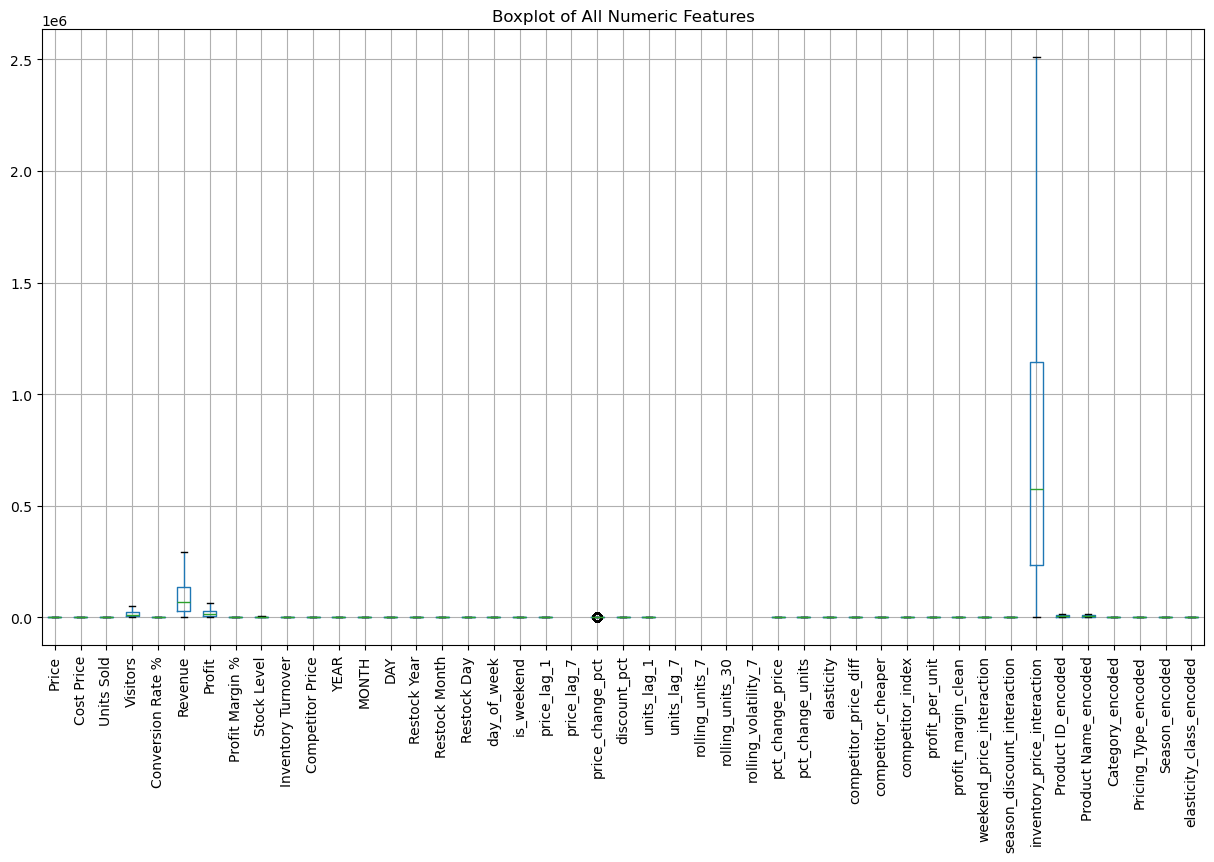

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of All Numeric Features")
plt.show()
